# Task 1: EDA & Preprocessing – CFPB Consumer Complaints
Goal: Understand data, filter to 5 products, clean narratives

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look nicer
%matplotlib inline
plt.style.use('seaborn-v0_8')   # or just 'seaborn' if that doesn't work
sns.set_palette("viridis")

In [2]:
# Cell 2 - Load the data and show basic info
DATA_PATH = "../data/raw/cfpb_complaints.csv"          # <--- change here if needed

df = pd.read_csv(DATA_PATH, low_memory=False)          # low_memory=False helps with mixed types

print("Shape (rows, columns):", df.shape)
print("\nColumns:")
print(df.columns.tolist())

print("\nFirst 3 rows preview:")
display(df.head(3))

print("\nData types and non-null counts:")
display(df.info(verbose=False))

Shape (rows, columns): (9609797, 18)

Columns:
['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue', 'Consumer complaint narrative', 'Company public response', 'Company', 'State', 'ZIP code', 'Tags', 'Consumer consent provided?', 'Submitted via', 'Date sent to company', 'Company response to consumer', 'Timely response?', 'Consumer disputed?', 'Complaint ID']

First 3 rows preview:


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689



Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Columns: 18 entries, Date received to Complaint ID
dtypes: int64(1), object(17)
memory usage: 1.3+ GB


None

In [ ]:
# Count Missing Narratives
df["Consumer complaint narrative"].isna().sum()

np.int64(6629041)

In [4]:
df.shape[0]

9609797

In [ ]:
# Calculate Percentage Missing (Simple)
missing_pct = df["Consumer complaint narrative"].isna().mean() * 100
missing_pct

np.float64(68.98211273349479)

In [ ]:
# create a copy of the dataframe with text narratives only
df_with_text = df[df["Consumer complaint narrative"].notna()].copy()
print("Shape of dataframe with text narratives:", df_with_text.shape)

Shape of dataframe with text narratives: (2980756, 18)


In [8]:
# Top 10 Products with Text Narratives
df_with_text["Product"].value_counts().head(10)

Product
Credit reporting or other personal consumer reports                             1091253
Credit reporting, credit repair services, or other personal consumer reports     807281
Debt collection                                                                  336076
Checking or savings account                                                      140319
Mortgage                                                                         130160
Credit card or prepaid card                                                      108667
Money transfer, virtual currency, or money service                                97188
Credit card                                                                       80667
Student loan                                                                      53209
Vehicle loan or lease                                                             39577
Name: count, dtype: int64

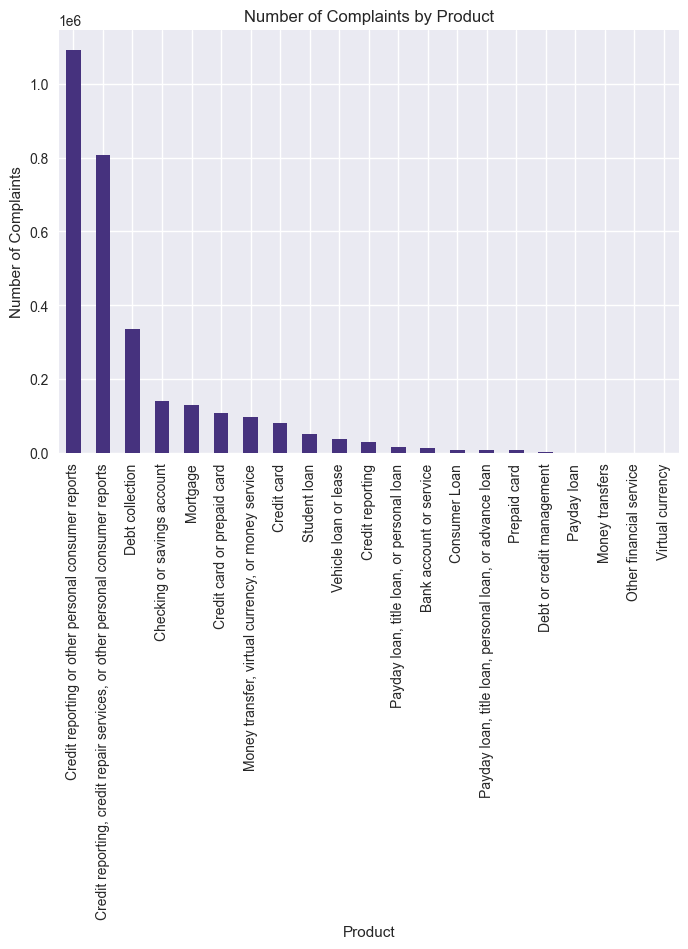

In [9]:
# Plot Number of Complaints by Product
import matplotlib.pyplot as plt

product_counts = df_with_text["Product"].value_counts()

plt.figure()
product_counts.plot(kind="bar")
plt.title("Number of Complaints by Product")
plt.xlabel("Product")
plt.ylabel("Number of Complaints")
plt.show()
